In [516]:
#In this file, I will finish preprocessing by normalizing the columns in the dataframe
#and then go on to visualize the data then build regression models to predict the salary of an MLB player
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/2019_stats_clean.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [517]:
#Drop the only two categorical features in the dataframe: player name and team id
stats.drop(['name','teamID'], axis = 1, inplace = True)

In [518]:
stats.head()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,position_3B,position_C,position_DH,position_OF,position_SS,throws_L,throws_R,bats_B,bats_L,bats_R
0,32,159.0,693.0,634.0,85.0,180.0,38.0,1.0,33.0,123.0,...,0,0,0,0,0,0,1,0,0,1
1,23,152.0,584.0,531.0,69.0,135.0,25.0,1.0,20.0,52.0,...,0,0,0,0,1,0,1,0,0,1
2,30,111.0,333.0,310.0,42.0,70.0,14.0,0.0,20.0,56.0,...,0,0,0,0,0,0,1,0,1,0
3,29,83.0,234.0,202.0,34.0,55.0,8.0,3.0,5.0,22.0,...,1,0,0,0,0,0,1,1,0,0
4,29,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,82.0,...,0,0,0,0,1,0,1,0,0,1


In [519]:
#Need to normalize all features besides those that are already one hot encoded (those before the last 12).
#We will implement a min-max normalization technique below 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
normalized = scale.fit_transform(stats)
print(normalized)

[[0.6        0.98064516 0.92692828 ... 0.         0.         1.        ]
 [0.15       0.93548387 0.77943166 ... 0.         0.         1.        ]
 [0.5        0.67096774 0.43978349 ... 0.         1.         0.        ]
 ...
 [0.7        0.29032258 0.24627876 ... 0.         0.         1.        ]
 [0.9        0.25806452 0.22733424 ... 1.         0.         0.        ]
 [0.4        0.53548387 0.38024357 ... 0.         0.         1.        ]]


In [520]:
#Convert from numpy array with min-max normalized values to a Pandas Dataframe
stats_normalized = pd.DataFrame(normalized, columns = stats.columns)
stats_normalized.head()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,position_3B,position_C,position_DH,position_OF,position_SS,throws_L,throws_R,bats_B,bats_L,bats_R
0,0.60,0.980645,0.926928,0.930267,0.629630,0.873786,0.655172,0.1,0.622642,0.976190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.15,0.935484,0.779432,0.777448,0.511111,0.655340,0.431034,0.1,0.377358,0.412698,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.50,0.670968,0.439783,0.449555,0.311111,0.339806,0.241379,0.0,0.377358,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.45,0.490323,0.305819,0.289318,0.251852,0.266990,0.137931,0.3,0.094340,0.174603,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.45,0.974194,0.834912,0.814540,0.585185,0.684466,0.568966,0.6,0.358491,0.650794,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [521]:
#Before creating visualizations to decide which features play 
#a significant role here, we restrict our dataset to players who aren't on rookie contracts.
#We do this because most young players on rookie contracts make around the same amount (regardless of their value based on their stats)
stats_ = stats_normalized.loc[(stats_normalized['Rookie contract'] == 0)]

Analysis of non-rookie position players

Text(0.5, 1.0, 'Salary vs. WAR')

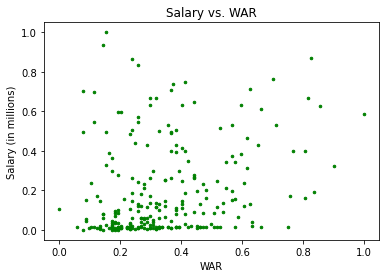

In [522]:
#Visualize what features contribute to salary for position players in the MLB.
import matplotlib.pyplot as plt
x = stats_['WAR']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('WAR')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. WAR')

Text(0.5, 1.0, 'Salary vs. OPS')

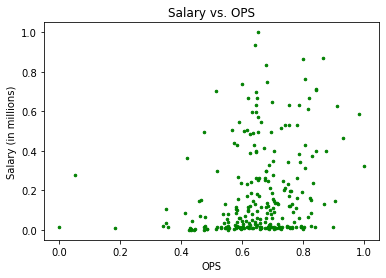

In [523]:
x = stats_['ops']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('OPS')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OPS')

Text(0.5, 1.0, 'Salary vs. Home Runs')

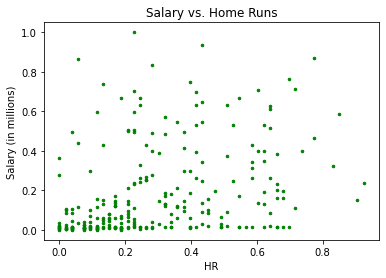

In [524]:
x = stats_['HR']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('HR')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Home Runs')

Text(0.5, 1.0, 'Salary vs. RBI')

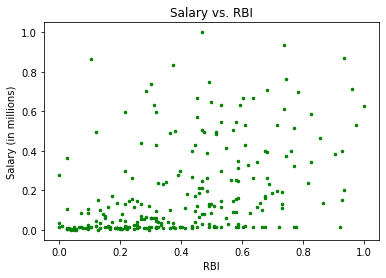

In [525]:
x = stats_['RBI']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('RBI')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. RBI')

Text(0.5, 1.0, 'Salary vs. avg')

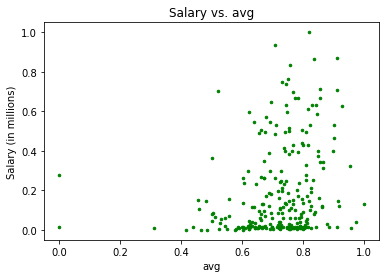

In [526]:
x = stats_['avg']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('avg')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. avg')

Text(0.5, 1.0, 'Salary vs. hits')

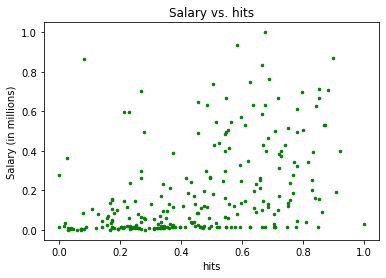

In [527]:
x = stats_['H']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('hits')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. hits')

Text(0.5, 1.0, 'Salary vs. games')

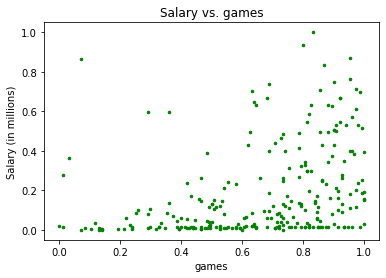

In [528]:
x = stats_['G']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('games')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. games')

Text(0.5, 1.0, 'Salary vs. GURU')

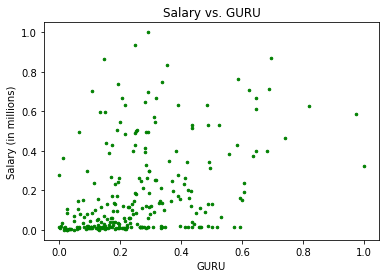

In [529]:
x = stats_['GURU']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('GURU')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. GURU')

Text(0.5, 1.0, 'Salary vs. PRO')

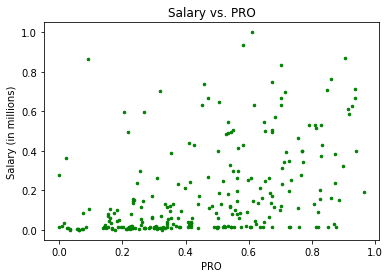

In [530]:
x = stats_['PRO']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('PRO')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. PRO')

Text(0.5, 1.0, 'Salary vs. OBP')

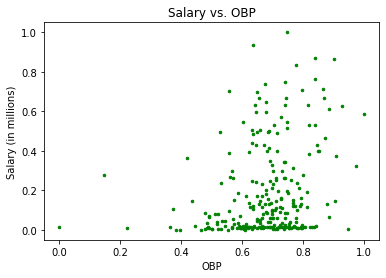

In [531]:
x = stats_['obp']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('OBP')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OBP')

Text(0.5, 1.0, 'Salary vs. SLG%')

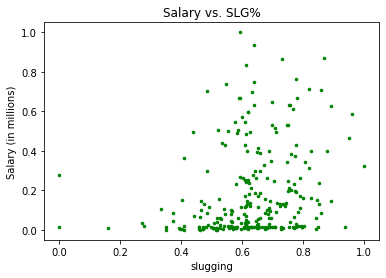

In [532]:
x = stats_['slg']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('slugging')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. SLG%')

Text(0.5, 1.0, 'Salary vs. Stolen Bases')

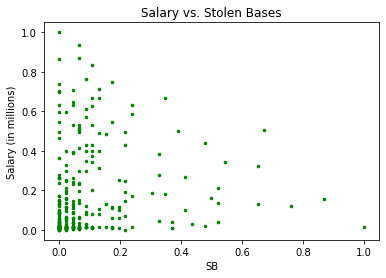

In [533]:
x = stats_['SB']
y = stats_['salary']
plt.scatter(x,y,s=6.5, color = 'green')
plt.xlabel('SB')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Stolen Bases')

Position Analysis - First Base

In [534]:
#We will start by doing position wide visualizations to see what features contribute to salary.
#We continue to use the .loc function to filter our results
first_base = stats_normalized.loc[(stats_normalized['position_1B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

Text(0.5, 1.0, 'Salary vs. OPS (1B)')

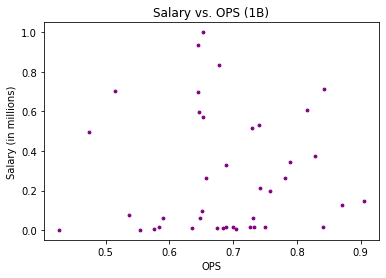

In [535]:
import matplotlib.pyplot as plt
x = first_base['ops']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('OPS')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OPS (1B)')

Text(0.5, 1.0, 'Salary vs. OBP (1B)')

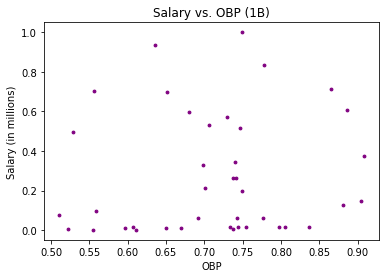

In [536]:
x = first_base['obp']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('OBP')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. OBP (1B)')

Text(0.5, 1.0, 'Salary vs. Homeruns (1B)')

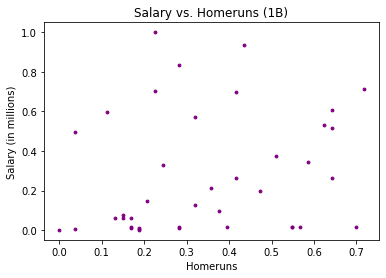

In [537]:
x = first_base['HR']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('Homeruns')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Homeruns (1B)')

Text(0.5, 1.0, 'Salary vs. SLG% (1B)')

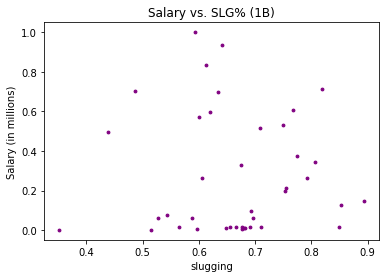

In [538]:
x = first_base['slg']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('slugging')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. SLG% (1B)')

Text(0.5, 1.0, 'Salary vs. Age (1B)')

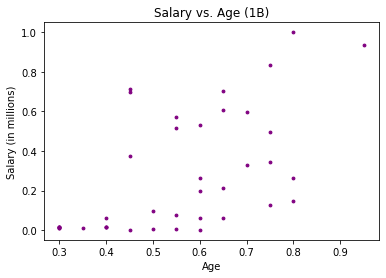

In [539]:
x = first_base['age']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age (1B)')

Text(0.5, 1.0, 'Salary vs. Wins Above Replacement (1B)')

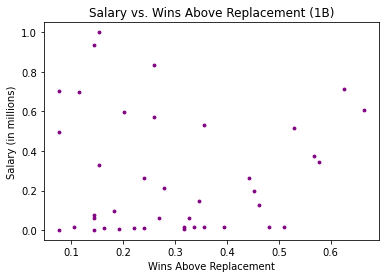

In [540]:
x = first_base['WAR']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('Wins Above Replacement')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Wins Above Replacement (1B)')

Text(0.5, 1.0, 'Salary vs. RBIs (1B)')

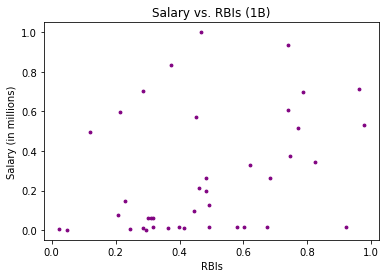

In [541]:
x = first_base['RBI']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('RBIs')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. RBIs (1B)')

Text(0.5, 1.0, 'Salary vs. hits (1B)')

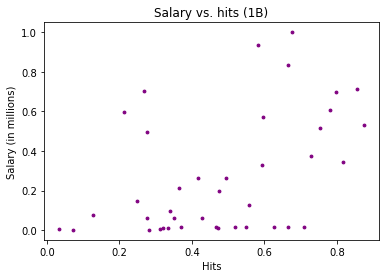

In [542]:
x = first_base['H']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('Hits')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. hits (1B)')

Text(0.5, 1.0, 'Salary vs. Strikeouts (1B)')

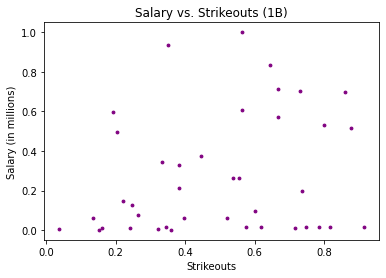

In [543]:
x = first_base['SO']
y = first_base['salary']
plt.scatter(x,y,s=8, color = 'purple')
plt.xlabel('Strikeouts')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Strikeouts (1B)')

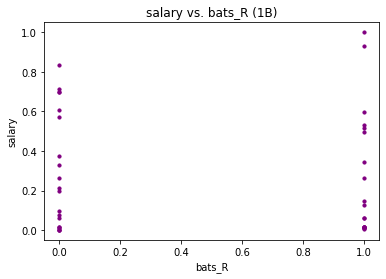

In [544]:
scatter_plotxy(first_base, 'bats_R', 'salary', 'purple', '1B')

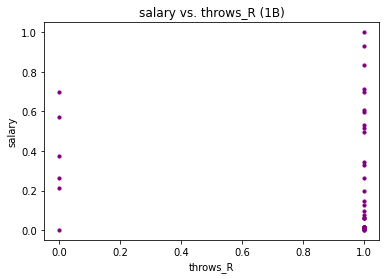

In [545]:
scatter_plotxy(first_base, 'throws_R', 'salary', 'purple', '1B')

In [546]:
#Write a function to plot so we don't have to repeat our matplotlib code over and over
def scatter_plotxy(dataframe, x, target, color, position):
  ind = dataframe[x]
  dep = dataframe[target]
  plt.scatter(ind,dep,s=10, color = color)
  plt.xlabel(x)
  plt.ylabel(target)
  plt.title(target + ' vs. ' + x + ' (' + position + ')')

Position Analysis - Second Base

In [547]:
#Now visualize how different features affect player salary for second baseman
second_b = stats_normalized.loc[(stats_normalized['position_2B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

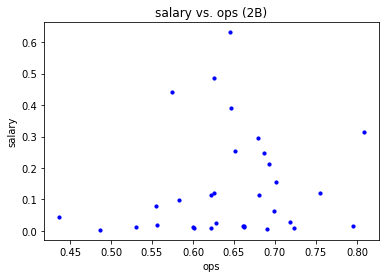

In [548]:
scatter_plotxy(second_b,'ops', 'salary', 'blue','2B')

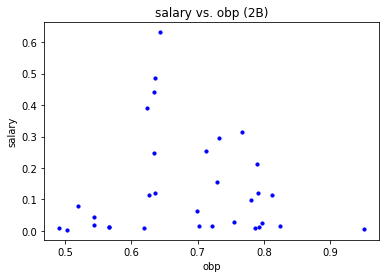

In [549]:
scatter_plotxy(second_b, 'obp', 'salary', 'blue', '2B')

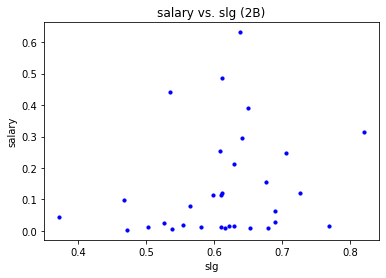

In [550]:
scatter_plotxy(second_b, 'slg', 'salary', 'blue', '2B')

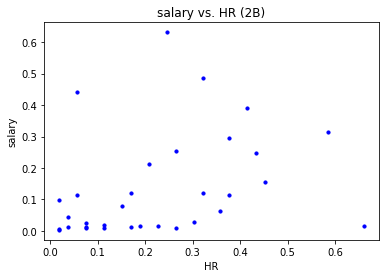

In [551]:
scatter_plotxy(second_b, 'HR', 'salary', 'blue', '2B')

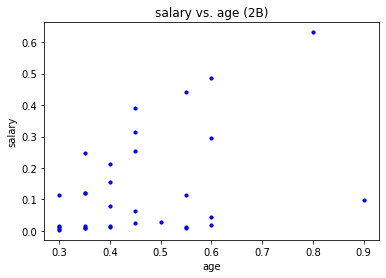

In [552]:
scatter_plotxy(second_b, 'age', 'salary', 'blue', '2B')

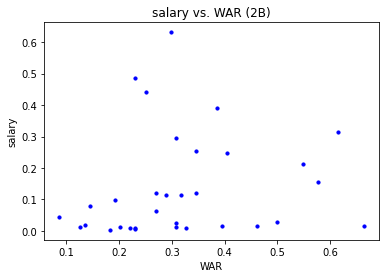

In [553]:
scatter_plotxy(second_b, 'WAR', 'salary', 'blue', '2B')

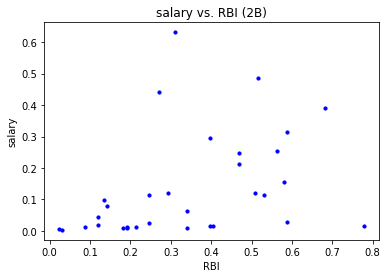

In [554]:
scatter_plotxy(second_b, 'RBI', 'salary', 'blue', '2B')

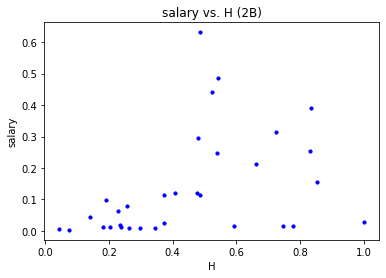

In [555]:
scatter_plotxy(second_b, 'H', 'salary', 'blue', '2B')

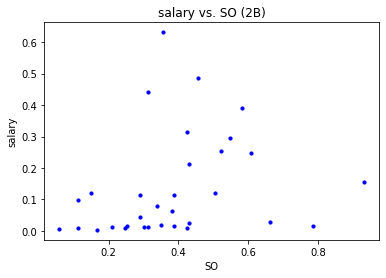

In [556]:
scatter_plotxy(second_b, 'SO', 'salary', 'blue', '2B')

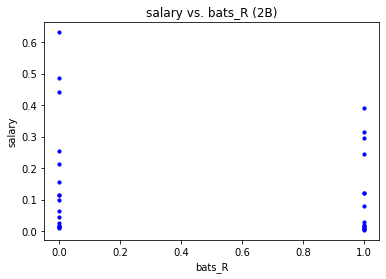

In [557]:
scatter_plotxy(second_b, 'bats_R', 'salary', 'blue', '2B')

Position Analysis - Third Base

In [558]:
#Now visualize how different features affect player salary for third baseman
third = stats_normalized.loc[(stats_normalized['position_3B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

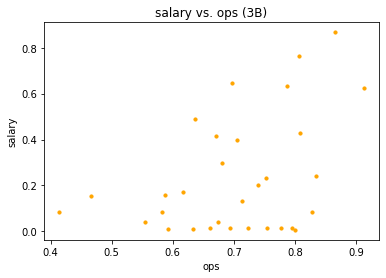

In [559]:
scatter_plotxy(third, 'ops', 'salary', 'orange', '3B')

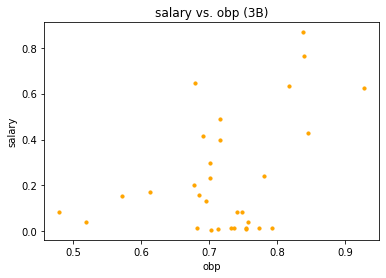

In [560]:
scatter_plotxy(third, 'obp', 'salary', 'orange', '3B')

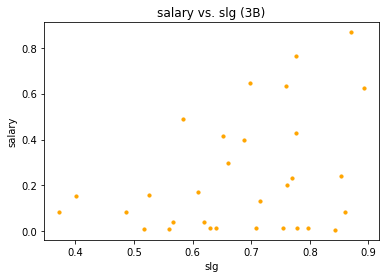

In [561]:
scatter_plotxy(third, 'slg', 'salary', 'orange', '3B')

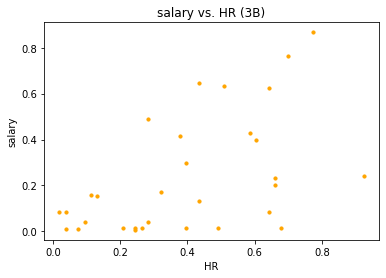

In [562]:
scatter_plotxy(third, 'HR', 'salary', 'orange', '3B')

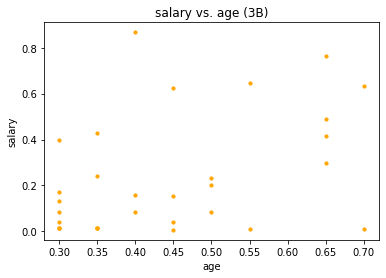

In [563]:
scatter_plotxy(third, 'age', 'salary', 'orange', '3B')

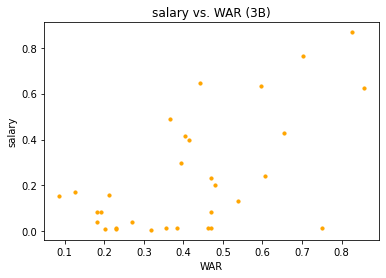

In [564]:
scatter_plotxy(third, 'WAR', 'salary', 'orange', '3B')

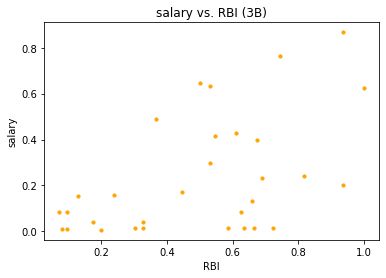

In [565]:
scatter_plotxy(third, 'RBI', 'salary', 'orange', '3B')

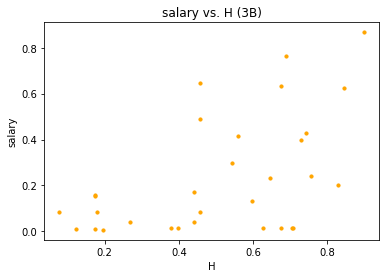

In [566]:
scatter_plotxy(third, 'H', 'salary', 'orange', '3B')

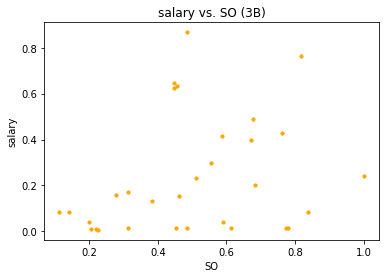

In [567]:
scatter_plotxy(third, 'SO', 'salary', 'orange', '3B')

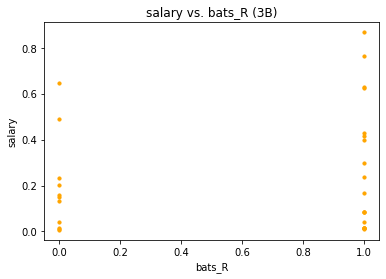

In [568]:
scatter_plotxy(third, 'bats_R', 'salary', 'orange', '3B')

Position Analysis - Catcher

In [569]:
#Now visualize how different features affect player salary for catchers
catcher = stats_normalized.loc[(stats_normalized['position_C'] == 1) & (stats_normalized['Rookie contract'] == 0)]

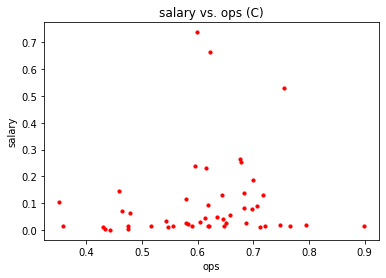

In [570]:
scatter_plotxy(catcher, 'ops', 'salary', 'red', 'C')

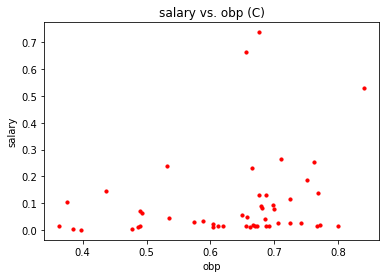

In [571]:
scatter_plotxy(catcher, 'obp', 'salary', 'red', 'C')

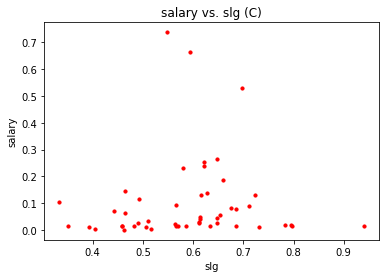

In [572]:
scatter_plotxy(catcher, 'slg', 'salary', 'red', 'C')

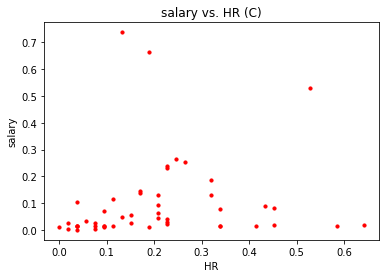

In [573]:
scatter_plotxy(catcher, 'HR', 'salary', 'red', 'C')

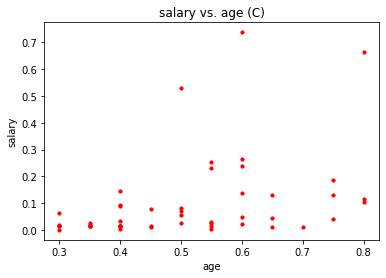

In [574]:
scatter_plotxy(catcher, 'age', 'salary', 'red', 'C')

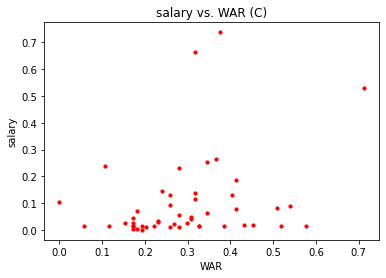

In [575]:
scatter_plotxy(catcher, 'WAR', 'salary', 'red', 'C')

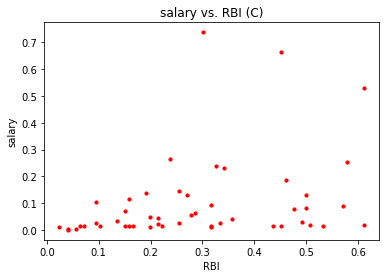

In [576]:
scatter_plotxy(catcher, 'RBI', 'salary', 'red', 'C')

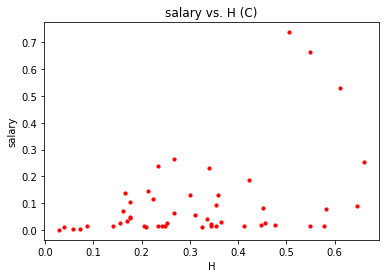

In [577]:
scatter_plotxy(catcher, 'H','salary', 'red','C')

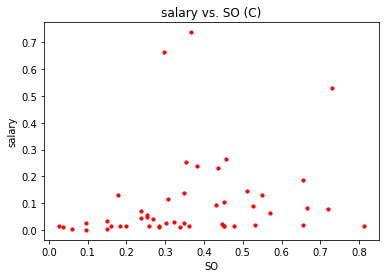

In [578]:
scatter_plotxy(catcher, 'SO','salary', 'red','C')

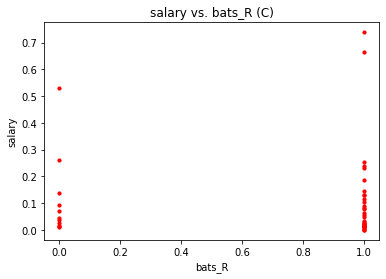

In [579]:
scatter_plotxy(catcher, 'bats_R', 'salary', 'red', 'C')

In [580]:
#Now visualize how different stats affect player salary for shortstops
short = stats_normalized.loc[(stats_normalized['position_SS'] == 1) & (stats_normalized['Rookie contract'] == 0)]

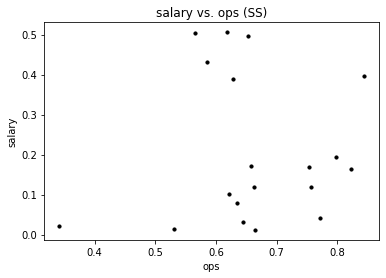

In [581]:
scatter_plotxy(short, 'ops', 'salary', 'black', 'SS')

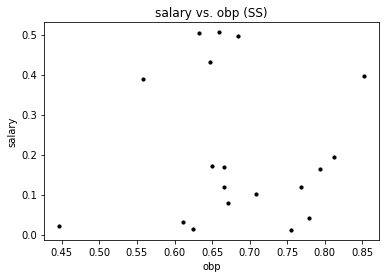

In [582]:
scatter_plotxy(short, 'obp', 'salary', 'black', 'SS')

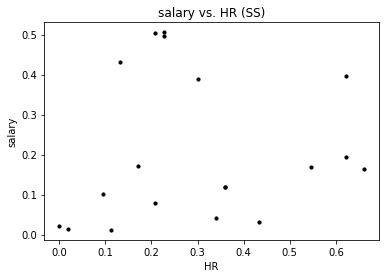

In [583]:
scatter_plotxy(short, 'HR', 'salary', 'black', 'SS')

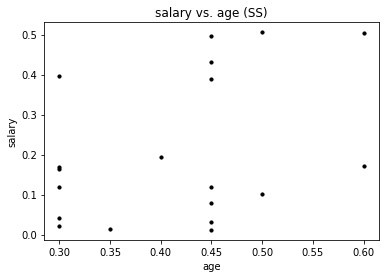

In [584]:
scatter_plotxy(short, 'age', 'salary', 'black', 'SS')

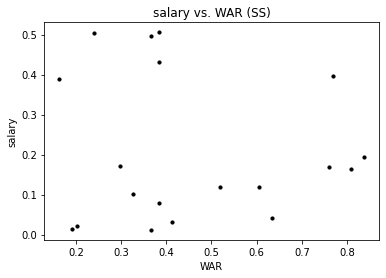

In [585]:
scatter_plotxy(short, 'WAR', 'salary', 'black', 'SS')

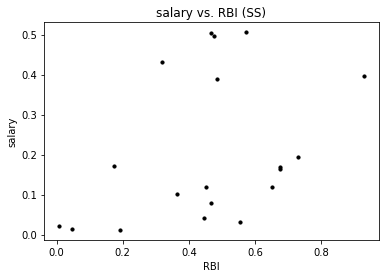

In [586]:
scatter_plotxy(short, 'RBI', 'salary', 'black', 'SS')

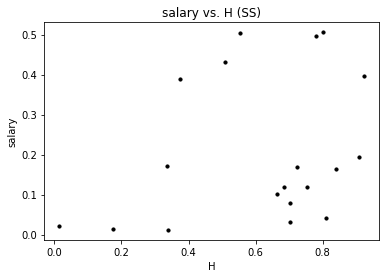

In [587]:
scatter_plotxy(short, 'H', 'salary', 'black', 'SS')

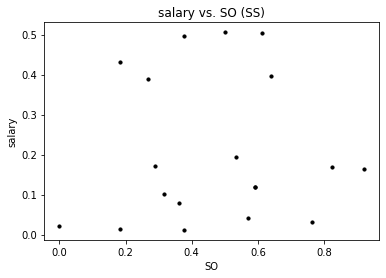

In [588]:
scatter_plotxy(short, 'SO', 'salary', 'black', 'SS')

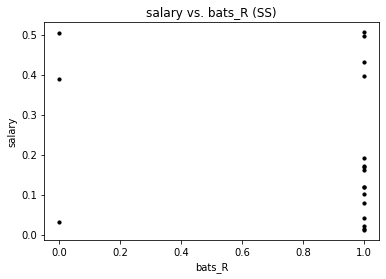

In [589]:
scatter_plotxy(short, 'bats_R', 'salary', 'black', 'SS')

Position Analysis - Designated Hitter

In [590]:
#Now visualize how different stats affect player salary for designated hitters
dh = stats_normalized.loc[(stats_normalized['position_DH'] == 1) & (stats_normalized['Rookie contract'] == 0)]

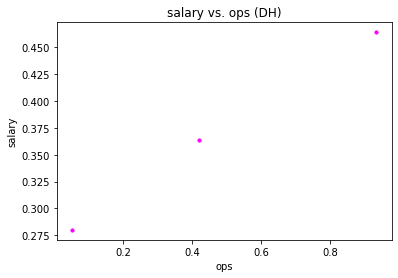

In [591]:
scatter_plotxy(dh, 'ops', 'salary', 'magenta', 'DH')

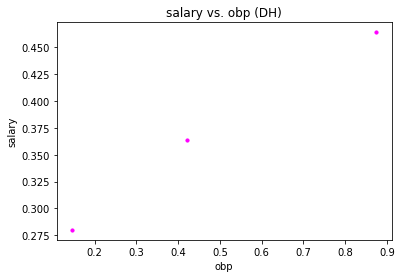

In [592]:
scatter_plotxy(dh, 'obp', 'salary', 'magenta', 'DH')

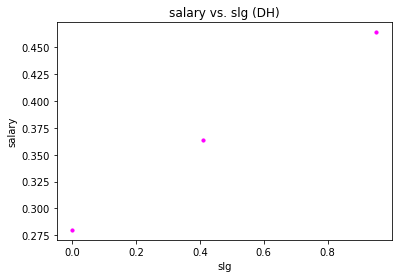

In [593]:
scatter_plotxy(dh, 'slg', 'salary', 'magenta', 'DH')

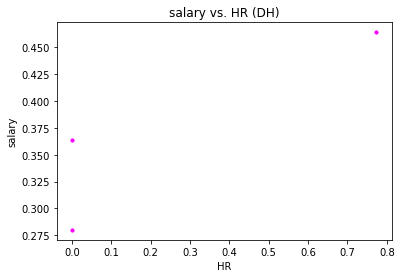

In [594]:
scatter_plotxy(dh, 'HR', 'salary', 'magenta', 'DH')

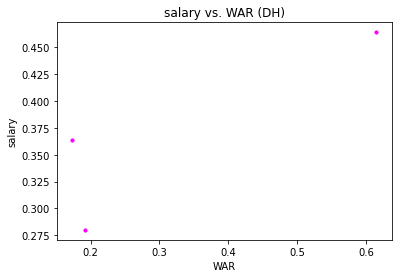

In [595]:
scatter_plotxy(dh, 'WAR', 'salary', 'magenta', 'DH')

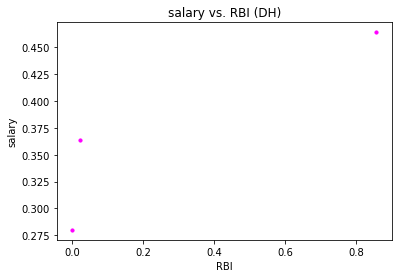

In [596]:
scatter_plotxy(dh, 'RBI', 'salary', 'magenta', 'DH')

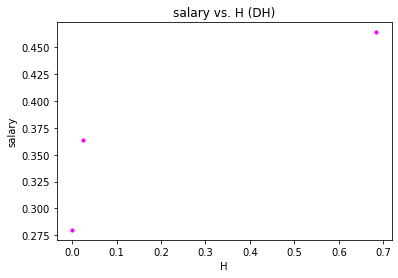

In [597]:
scatter_plotxy(dh,'H', 'salary', 'magenta', 'DH')

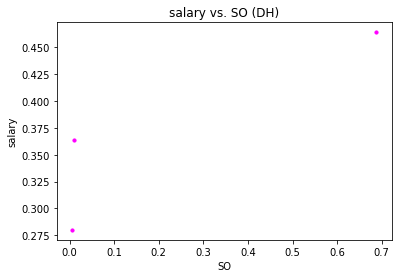

In [598]:
scatter_plotxy(dh,'SO', 'salary', 'magenta', 'DH')

Position Analysis - Outfielders

In [599]:
outfield = stats_normalized.loc[(stats_normalized['position_OF'] == 1) & (stats_normalized['Rookie contract'] == 0)]

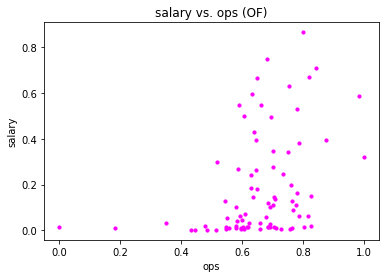

In [600]:
scatter_plotxy(outfield,'ops', 'salary', 'magenta', 'OF')

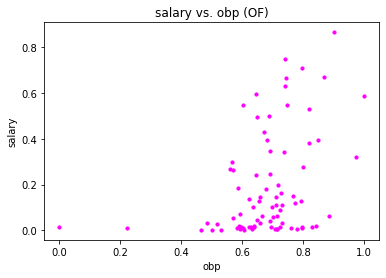

In [601]:
scatter_plotxy(outfield,'obp', 'salary', 'magenta', 'OF')

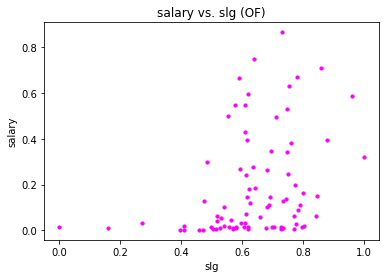

In [602]:
scatter_plotxy(outfield,'slg', 'salary', 'magenta', 'OF')

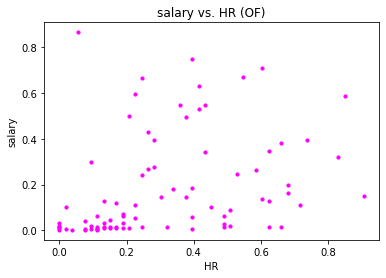

In [603]:
scatter_plotxy(outfield,'HR', 'salary', 'magenta', 'OF')

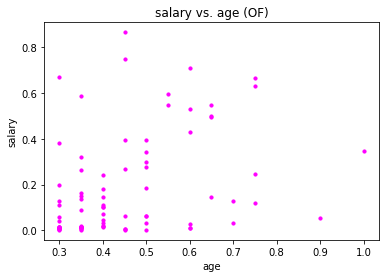

In [604]:
scatter_plotxy(outfield,'age', 'salary', 'magenta', 'OF')

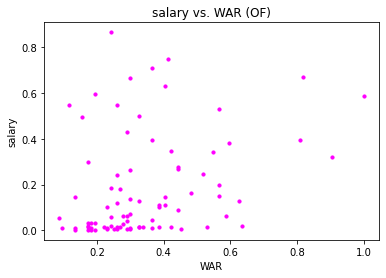

In [605]:
scatter_plotxy(outfield,'WAR', 'salary', 'magenta', 'OF')

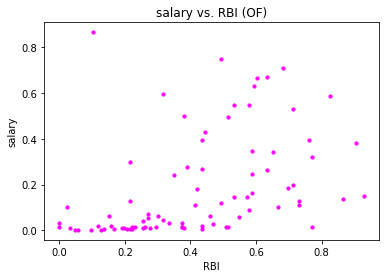

In [606]:
scatter_plotxy(outfield,'RBI', 'salary', 'magenta', 'OF')

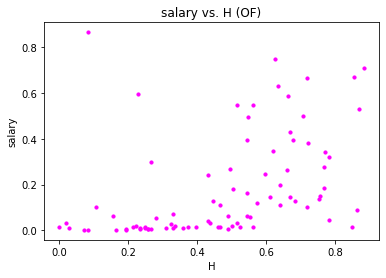

In [607]:
scatter_plotxy(outfield,'H', 'salary', 'magenta', 'OF')

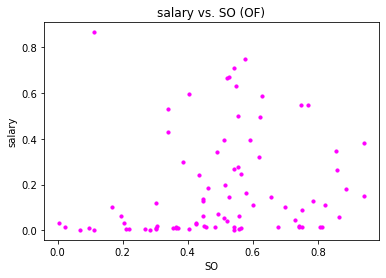

In [608]:
scatter_plotxy(outfield,'SO', 'salary', 'magenta', 'OF')

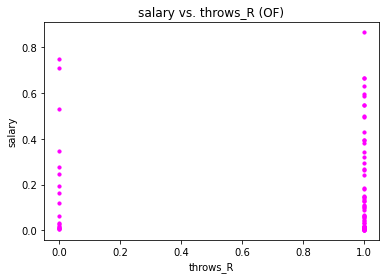

In [609]:
scatter_plotxy(outfield,'throws_R', 'salary', 'magenta', 'OF')

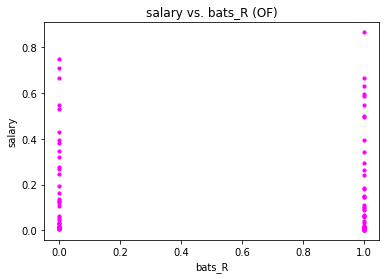

In [610]:
scatter_plotxy(outfield,'bats_R', 'salary', 'magenta', 'OF')